# Лабораторная работа 3
Для имеющихся временных рядов сделать:
1. Преобразование Фурье. (Изобразить диаграмму мощности гармоник, увидеть, чем периодический ряд отличается от хаотическогорю Use numpy.fft.fft)
2. Сингулярное спектральное разложение (Изобразить наиболее характерные компоненты с помощью pymssa).
3. Прогноз на несколько шагов с помощью SSA. (Будет охота поэкспериментировать с Фурье — тоже можно)
4. Изображение автокорреляционных функций для обоих рядов.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import MinMaxScaler, StandardScaler


In [2]:
periodical_df = pd.read_csv('../data/period.csv')[1600:2500]
periodical_df['Moving_Average'] = periodical_df['Temp'].rolling(window=20).mean()
period_ts = periodical_df.Moving_Average.values[20:]
period_ts= MinMaxScaler().fit_transform(period_ts.reshape(-1, 1)).flatten()

In [3]:
def generate_random_walk(steps):
    """Случайное блуждание"""
    position = 0
    time_series = [position]
    random.seed(42)
    for _ in range(1,steps):
        step = random.choice([-1, 1])
        position += step
        time_series.append(position)
    return np.array(time_series)

random_ts = generate_random_walk(880)
random_ts= MinMaxScaler().fit_transform(random_ts.reshape(-1, 1)).flatten()

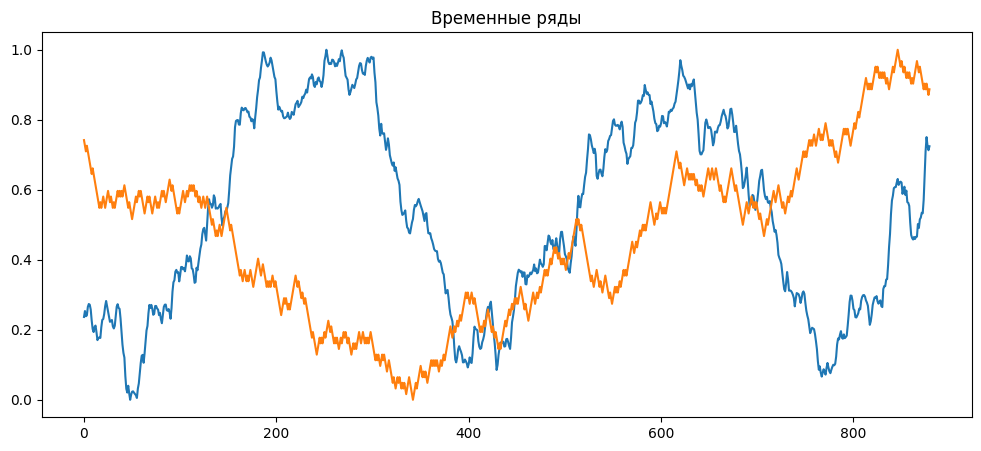

In [4]:
plt.figure(figsize=(12,5))
plt.title('Временные ряды')
plt.plot(period_ts,label ='Периодический')
plt.plot(random_ts,label ='Случайный')
plt.show()

Функция вычисления частот и магнитуды.

In [5]:
def draw_fft(time_series):
    fft_result = np.fft.fft(time_series)
    fft_abs = np.abs(fft_result) / time_series.size
    freqs = np.fft.fftfreq(len(time_series), d=15*60)
    idx_stock = np.argmax(freqs < 0)

    return fft_abs[1:idx_stock]
f_random = draw_fft(random_ts)
f_period = draw_fft(period_ts)

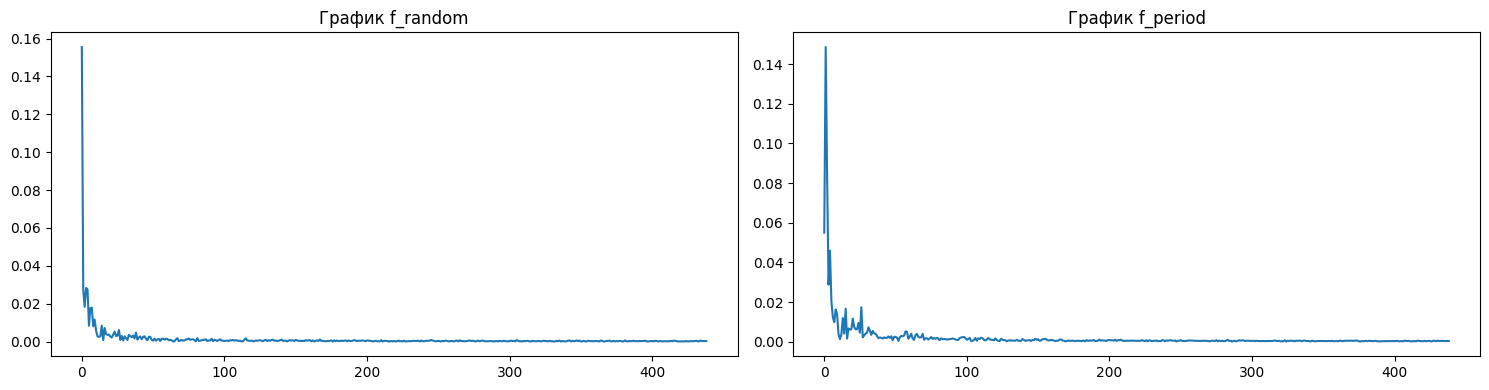

In [6]:
# Первый график
plt.figure(figsize=(15,4))
plt.subplot(1, 2, 1)  # 1 строка, 2 столбца, первый график
plt.plot(f_random)
plt.title('График f_random')

# Второй график
plt.subplot(1, 2, 2)  # 1 строка, 2 столбца, второй график
plt.plot(f_period)
plt.title('График f_period')

# Показать графики
plt.tight_layout()
plt.show()

MSA

In [7]:
from pymssa.pymssa import MSSA

In [8]:
mssa = MSSA(n_components=3,
            window_size=30,
            verbose=True)
x= random_ts
mssa.fit(x)

Constructing trajectory matrix
Trajectory matrix shape: (30, 851)
Decomposing trajectory covariance matrix with SVD
Constructing components


c:\Users\kiril\PycharmProjects\MatObes\Shvab\Lab 3\pymssa\pymssa\optimized.py:228: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (Array(float64, 2, 'A', False, aligned=True), Array(float64, 2, 'A', False, aligned=True))
  components = _incremental_component_reconstruction_inner(


Calculating optimal reconstruction orders


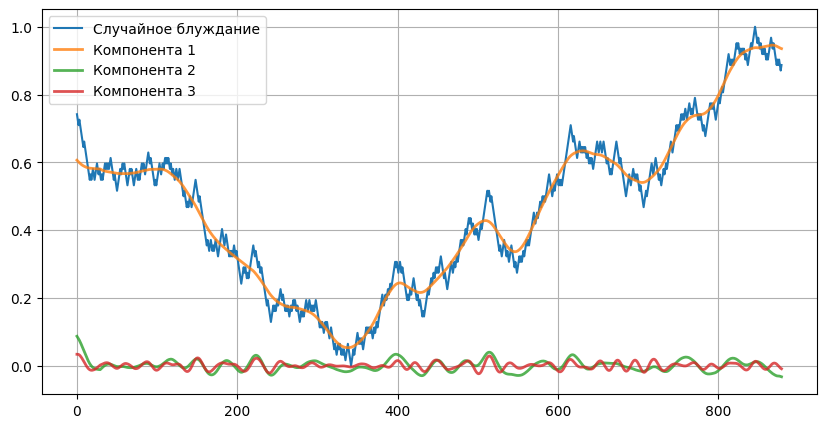

In [9]:
fig=plt.figure(figsize=(10, 5))
plt.plot(random_ts, label='Случайное блуждание')
plt.grid()

for idx in range(3):
    component = mssa.components_[0, :, idx]
    plt.plot(component, lw=2, alpha=0.8, label=f'Компонента {idx + 1}')

plt.legend()

In [10]:
mssa = MSSA(n_components=3,
            window_size=30,
            verbose=True)
x = period_ts
mssa.fit(x)

Constructing trajectory matrix
Trajectory matrix shape: (30, 851)
Decomposing trajectory covariance matrix with SVD
Constructing components
Calculating optimal reconstruction orders


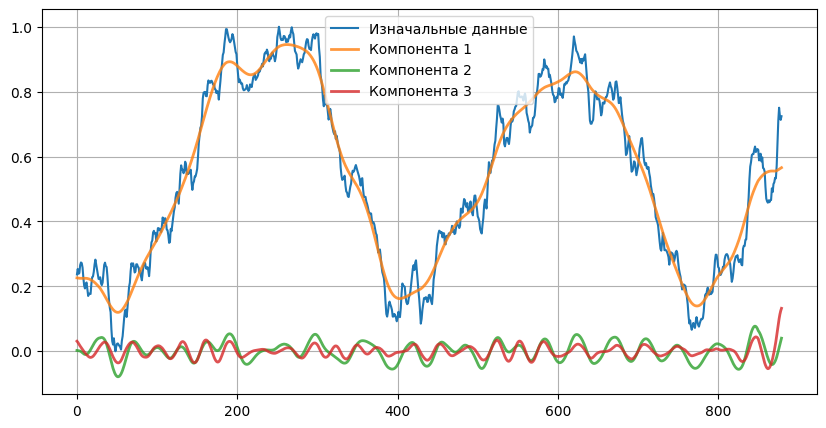

In [11]:
fig=plt.figure(figsize=(10, 5))
plt.plot(period_ts, label='Изначальные данные')
plt.grid()

for idx in range(3):
    component = mssa.components_[0, :, idx]
    plt.plot(component, lw=2, alpha=0.8, label=f'Компонента {idx + 1}')

plt.legend()

Автокорреляционная функция 

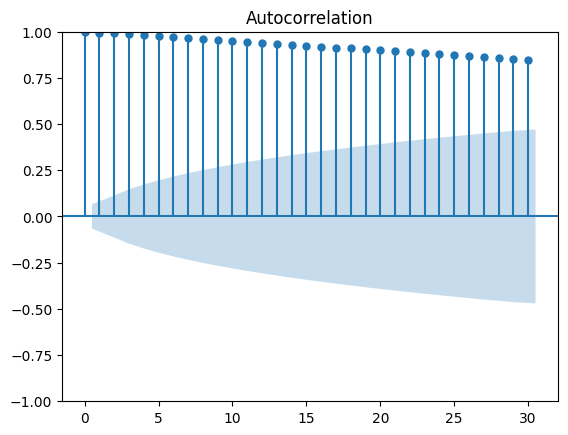

In [12]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(random_ts)
plt.show()

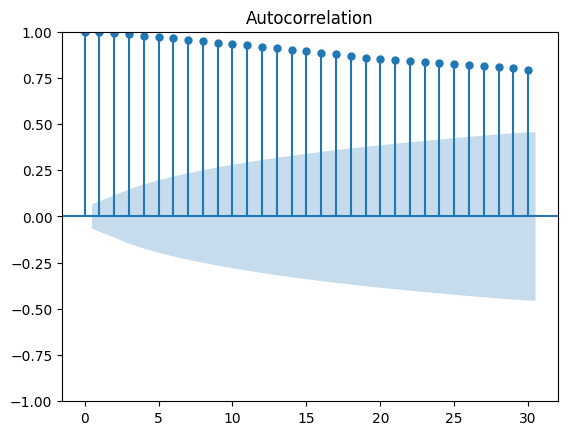

In [13]:
plot_acf(period_ts)
plt.show()